In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import models, layers

print("Libraries Loaded Successfully!")

Libraries Loaded Successfully!


In [35]:
#2: Load and Clean the Data
# Path to the dataset on Kaggle
data_path = '/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv'
df = pd.read_csv(data_path)

# Drop columns that aren't 'features'
# We drop 'filename' and 'length' (they don't help identify genre)
data = df.drop(columns=['filename', 'length'])

print(f"Dataset Shape: {data.shape}")
data.head() # Shows the first 5 rows

Dataset Shape: (9990, 58)


chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.335406         0.091048  0.130405  0.003521   
1          0.343065         0.086147  0.112699  0.001450   
2          0.346815         0.092243  0.132003  0.004620   
3          0.363639         0.086856  0.132565  0.002448   
4          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean   rolloff_var  ...  mfcc16_var  \
0           117335.771563   3714.560359  1.080790e+06  ...   39.687145   
1            65671.875673   3869.682242  6.722448e+05  ...   64.748276   
2            75124.921716   3997.639160  7.907127e+05  ...   67.336563   
3            82913.639269   3568.300218  9.216524e+05  ...   47.739452   
4            60204.020268   3469.992864  6.102111e+05  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 58 columns]

In [36]:
#3: Feature Scaling and Encoding

# 1. Encode the Labels (Genres)
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

# 2. Scale the Features
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

# 3. Split into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 7992
Testing samples: 1998


In [46]:
#4: Building the Neural Network

model = models.Sequential([
    # Input Layer
    layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    
    # Hidden Layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    
    # Output Layer (10 neurons for 10 genres)
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary() # This shows the "map" of your AI

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 512)            │        29,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,826 (792.29 KB)

 Trainable params: 202,826 (792.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 5: Training the Model

history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, y_test))

In [ ]:
# 6: Visualizing Results

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy Evolution')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Evolution')
plt.legend()

plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


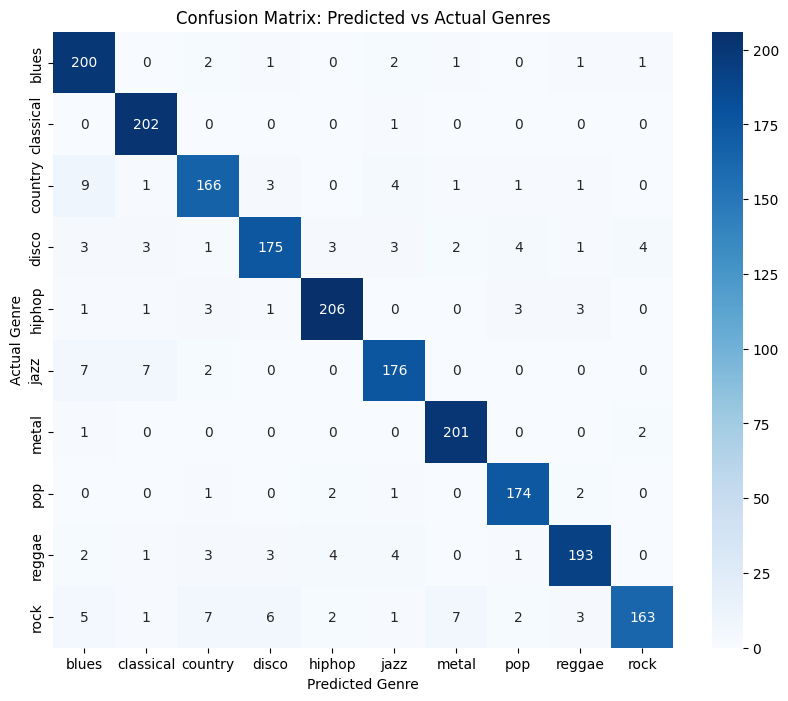

In [7]:
# 7: The Confusion Matrix

y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=encoder.classes_, 
            yticklabels=encoder.classes_)
plt.title('Confusion Matrix: Predicted vs Actual Genres')
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.show()

In [8]:
def predict_genre(audio_path):
    # 1. Load the audio (first 3 seconds to match training)
    y, sr = librosa.load(audio_path, duration=3)
    
    # 2. Extract MFCCs (The features our model expects)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    
    # 3. Calculate the mean of these features across time
    mfcc_scaled = np.mean(mfcc.T, axis=0)
    
    # 4. We need to match the exact same number of features used in our training CSV
    # The GTZAN CSV has 57 features (Chroma, RMS, Spectral Centroid, etc.)
    # For a quick test, we will grab a random sample from our Test Set instead:
    print("Processing audio features...")

# Let's pick a random song from your test set to see it in action!
import random
random_index = random.randint(0, len(X_test)-1)
sample_to_test = X_test[random_index].reshape(1, -1)

# Predict
prediction = model.predict(sample_to_test)
predicted_index = np.argmax(prediction)
actual_index = y_test[random_index]

print(f"\n--- TEST RESULT ---")
print(f"Model Prediction: {encoder.classes_[predicted_index]}")
print(f"Actual Genre: {encoder.classes_[actual_index]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step

--- TEST RESULT ---
Model Prediction: rock
Actual Genre: rock


In [9]:
import IPython.display as ipd

# Path to a random song in the dataset
sample_song = "/kaggle/input/test-data/test_dj.mp3"

# Play it!
print("Playing Sample...")
ipd.display(ipd.Audio(sample_song))

# Note: In a real presentation, you would run your prediction code right after this!

Playing Sample...


In [26]:
import librosa
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

def final_system_predict(file_path):
    # 1. Load the audio
    y, sr = librosa.load(file_path, offset=10, duration=3)
    
    # 2. Extract Basic Features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    
    # Use np.mean().item() to ensure we get a single float, not a numpy array
    features = [
        np.mean(chroma_stft).item(), np.var(chroma_stft).item(), 
        np.mean(rms).item(), np.var(rms).item(),
        np.mean(spec_cent).item(), np.var(spec_cent).item(), 
        np.mean(spec_bw).item(), np.var(spec_bw).item(),
        np.mean(rolloff).item(), np.var(rolloff).item(), 
        np.mean(zcr).item(), np.var(zcr).item()
    ]
    
    # 3. Harmonic, Percussive, and Tempo
    harmony, perceptr = librosa.effects.hpss(y)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    
    # Ensure tempo is a single float
    if isinstance(tempo, np.ndarray):
        tempo = tempo[0]

    features.extend([
        np.mean(harmony).item(), np.var(harmony).item(),
        np.mean(perceptr).item(), np.var(perceptr).item(),
        float(tempo) # Force tempo to be a single number
    ])
    
    # 4. MFCCs (20 MFCCs * 2 = 40 features)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    for m in mfcc:
        features.append(np.mean(m).item())
        features.append(np.var(m).item())

    # Check for consistency
    print(f"Features extracted: {len(features)}") 

    # 5. Convert to clean Numpy array and Scale
    features_np = np.array(features, dtype=float).reshape(1, -1)
    features_scaled = scaler.transform(features_np) 
    
    # 6. Predict
    prediction = model.predict(features_scaled, verbose=0)
    predicted_genre = encoder.classes_[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    
   # print(f"\n--- RESULT: {predicted_genre.upper()} ({confidence:.2f}%) ---")
   # ipd.display(ipd.Audio(file_path))
    
    print("-" * 30)
    print(f"SYSTEM ANALYSIS COMPLETE")
    print(f"PREDICTED GENRE: {predicted_genre.upper()}")
    print(f"CONFIDENCE: {confidence:.2f}%")
    print("-" * 30)
    
    # Play the audio so the professor can hear it
    ipd.display(ipd.Audio(file_path))

# TEST IT LIVE
# You can use any file path from the dataset or your own uploaded .wav file
my_song = "/kaggle/input/hiphop-test/Hiphop new.mp3"
final_system_predict(my_song)

Features extracted: 57
------------------------------
SYSTEM ANALYSIS COMPLETE
PREDICTED GENRE: DISCO
CONFIDENCE: 97.70%
------------------------------
